# <h1><center>Tampon (Buffer) Analizi</center></h1>


Tampon (Buffer) Analizi, Coğrafi Bilgi Sistemleri içerisinde gerçekleştirilen en önemli konumsal analiz yöntemlerindendir. Bir nokta / çizgi / alan etrafında belirli bir mesafenin içerisinde kalan alanı tespit etmeye yönelik kullanılır. Tampon analizini gerçekleştirebilmek için, çalıştığımız projeksiyon sisteminin metre cinsinden ölçü alınabilir olması gerekmektedir, aksi takdirde konumsal hata oluşacaktır. 


In [1]:
# Kütüphanelerimizi yükleyelim. 
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Ülkeler veri setini okuyalım
countries = gpd.read_file('countries.shp')
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Geopandas kütüphanesinin `centroid` yöntemini kullanarak, her ülkeye ait olan poligonun merkez noktasını tespit edelim.

In [3]:
country_centroids = countries.geometry.centroid
country_centroids.head()

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

<AxesSubplot:>

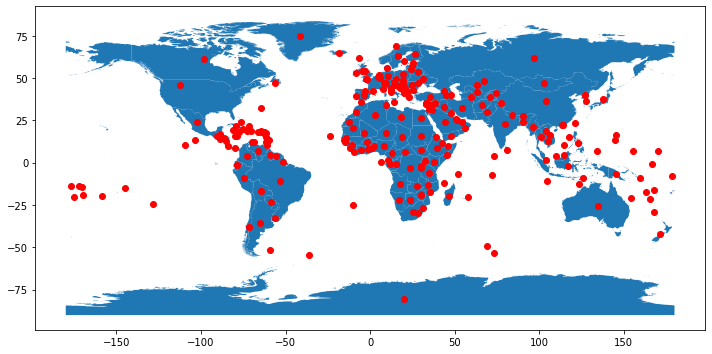

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red') 

<AxesSubplot:>

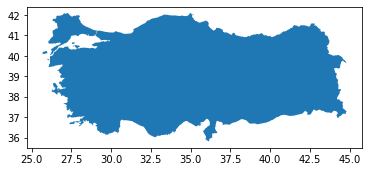

In [5]:
# Seçtiğimiz bir ülkeyi ayıklayalım. Türkiye'yi ele alalım. 
turkey = countries[countries["NAME"] == "Turkey"]
turkey.plot()

In [6]:
# Projeksiyonu kontrol edelim
turkey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Türkiye poligonunun merkez noktasını görelim
turkey_centroid = turkey.geometry.centroid
turkey_centroid.head()

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


66    POINT (35.16724 39.06108)
dtype: geometry

In [8]:
# Bu noktanın projeksiyonuna bakalım
turkey_centroid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

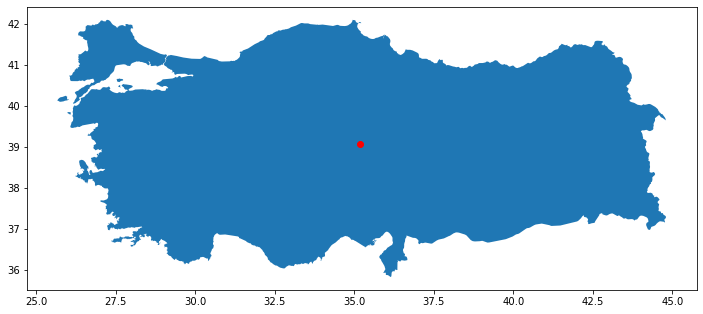

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
turkey.plot(ax=ax)
turkey_centroid.plot(ax=ax, color='red') 

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.
C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


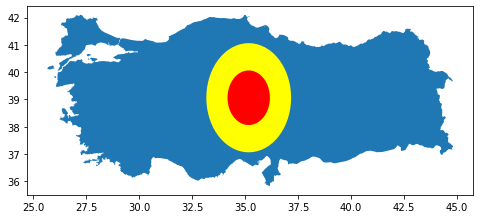

In [10]:
# Üzerinde çalıştığımız projeksiyon sistemi metre cinsinden değil, derece cinsindendir.
# Dolayısıyla 1 ve 2 derecelik tamponları, bu merkez nokta için oluşturalım. 
# Bunun için buffer yöntemi kullanılacaktır. Argüman olarak kaç derecelik tampon oluşturacağımızı girmeliyiz. 
turkey_centroids_1degree = turkey_centroid.buffer(1)
turkey_centroids_2degree = turkey_centroid.buffer(2)

#2 derecelik tamponu sarı renk, 1 derecelik tamponu kırmızı renk ile gösterelim.

fig, ax = plt.subplots(figsize=(8,6))
turkey.plot(ax=ax)
turkey_centroids_2degree.plot(ax=ax, color='yellow')
turkey_centroids_1degree.plot(ax=ax, color='red')
plt.show()



* Üzerine çalıştığımız projeksiyon coğrafi koordinatlar içerdiği için, metre cinsinden tampon oluşturmaya müsaade etmiyordu.
* Dolayısıyla elimizdeki verileri TUREF (Türkiye Ulusal Referans Çerçevesi) projeksiyonuna (epsg:5259) çevireceğiz

In [11]:
turkey_centroid_projected = turkey_centroid.to_crs({'init': 'epsg:5259'})
turkey_projected = turkey.to_crs({'init': 'epsg:5259'})
turkey_centroid_projected.crs

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Projected CRS: +init=epsg:5259 +type=crs>
Name: TUREF / TM45
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Turkey - east of 43.5°E
- bounds: (43.5, 36.97, 44.83, 41.02)
Coordinate Operation:
- name: Gauss-Kruger CM 45E
- method: Transverse Mercator
Datum: Turkish National Reference Frame
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

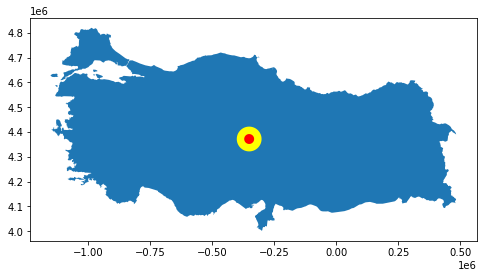

In [12]:
# Metre cinsinden bir projeksiyona dönüşümden sonra merkez nokta üzerine 20 km'lik ve 50 km'lik iki adet tampon oluşturalım.
turkey_centroids_20km = turkey_centroid_projected.buffer(20000)
turkey_centroids_50km = turkey_centroid_projected.buffer(50000)

# Dönüştürülmüş projeksiyona göre Türkiye haritasını ve tamponları tek tek çizelim.
fig, ax = plt.subplots(figsize=(8,6))
turkey_projected.plot(ax=ax)
turkey_centroids_50km.plot(ax=ax, color='yellow')
turkey_centroids_20km.plot(ax=ax, color='red')

plt.show()